In [153]:
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random as rnd
from sklearn import preprocessing
#Para BFS
from collections import deque

<h1>Módulo 4: Redes<h4>

<h3>1. Creación del Grafo</h3>
<blockquote>Lo primero que hacemos es levantar el archivo data.csv para identificar los nombres del autor y coautur/es.</blockquote>

In [37]:
path_to_data = "data.csv"
data = open(path_to_data,'r')
all_lines = data.readlines()
data.close()

In [38]:
all_lines[0]

'1992, B368,  Nucl.Phys., Horne & Horowitz,  Exact Black String Solutions in Three Dimensions\n'

<blockquote><b>Obs:</b> El formato parace ser: 
<br>"Fecha, unCodigo, unlugar, varios Autores/Coautores, unNombreDePublicacion"
<br>Sólo nos interesan los autores/coautores.</blockquote>

In [39]:
G = nx.Graph()

def strip_withou_space(aString):
    return str.strip(aString).replace(" ", "")

## Every authour/coauthor is a node.
##This is a way to map from names to numbers that represent the index of the node in our graph.
name_to_node_index = {}

## Every co-authorship is an edges of our graph.
edges = set()

for a_pub_info in all_lines:    
    pub_split = a_pub_info.split(",")[3]
    list_of_authors = pub_split.split("&")
    names_in_this_pub = list( map(strip_withou_space, list_of_authors) )
    
    for name in names_in_this_pub:
        if name not in name_to_node_index:
            name_to_node_index[name] = len(name_to_node_index)+1
    
    nodes_to_connect = [name_to_node_index[name] for name in names_in_this_pub]
    K = nx.complete_graph(nodes_to_connect)
    G.add_edges_from(K.edges)
    G.add_nodes_from(K) # if there is only one author, you add K1. K1 has no edge.

In [40]:
print ( "Cantidad de nodos en el grafo: {}".format(G.number_of_nodes()) )
print ( "Cantidad de ejes en el grafo: {}".format(G.number_of_edges()) )

Cantidad de nodos en el grafo: 4027
Cantidad de ejes en el grafo: 7977


<h3>Primer vista del grafo</h3>
<blockquote>Hechemos un vistazo del lag que tiene para dibujar esto</blockquote>

In [41]:
def plot_this_graph(graph, g_label):
    plt.clf()
    plt.figure(1,figsize=(70,20))
    plt.axis('off')
    nx.draw_networkx(graph, node_color=color, label="{}".format(g_label), pos=nx.spring_layout(giant_component),node_shape="o", node_size=100, with_labels=False, edge_color='grey')
    #nx.draw(graph, label=g_label, alpha=0.8, pos=nx.spring_layout(graph), node_shape=".", node_size=5, with_labels=False, node_color='red', edge_color='grey')
    plt.show()

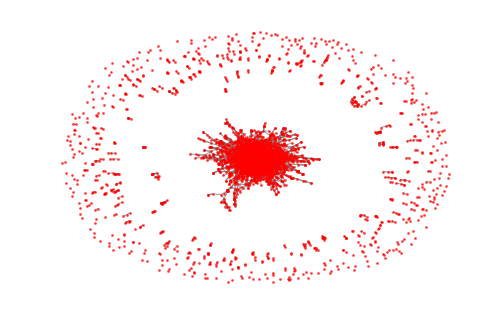

In [7]:
plot_this_graph(G, "Ploteo grafo original")

<h3>2. Distribución de Grado</h3>
<blockquote>Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica y log-log. Argument, a partir de los gráficos, de qu ́e tipo de distribución se trata.</blockquote>

In [132]:
list_of_degres = nx.degree_histogram(G)
x = pd.Series(list_of_degres, name="Distribucion de los Grados")

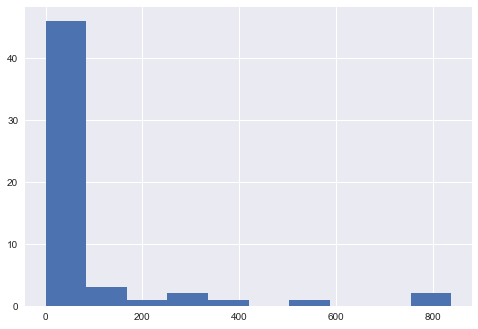

In [129]:
#Hay que darlo vuelta, me canse
plt.clf()
ax1 = plt.hist(x, normed=0)
sns.plt.show()

Lo bueno sería dibujar cada una con la exponencial al lado, pero no pude generar los valores de la exponencial. De todas formas tampoco me quedó claro cuando la comparación tiene sentido. El mártes lo pregunto.

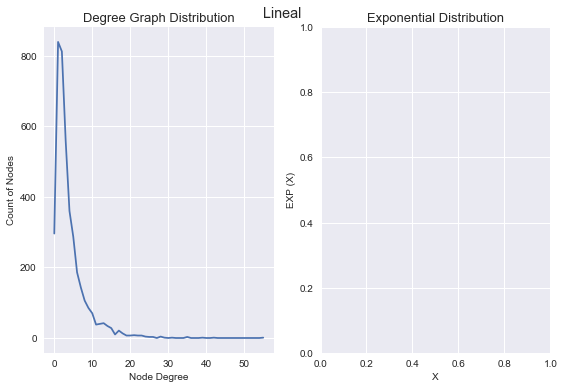

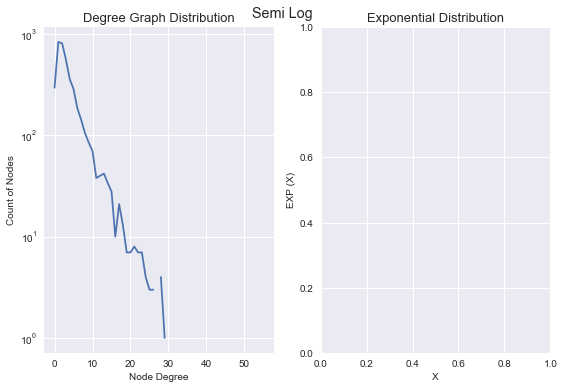

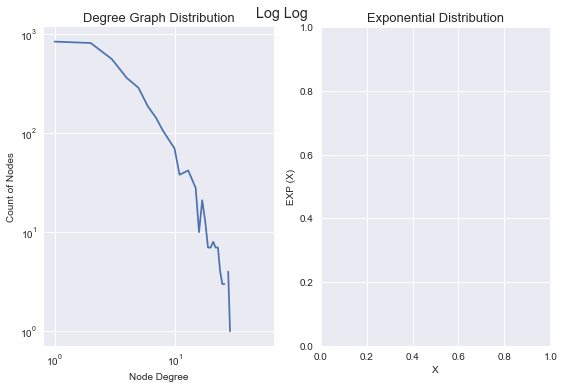

In [130]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)


ax1.plot(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
ax1.set_title('Degree Graph Distribution', fontsize=13)
ax2.set_xlabel('X', fontsize=10)
ax2.set_ylabel('EXP (X)', fontsize=10)
ax2.set_title('Exponential Distribution', fontsize=13)
plt.suptitle("Lineal")
plt.tight_layout()
plt.show()

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)

ax1.semilogy(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
ax1.set_title('Degree Graph Distribution', fontsize=13)
ax2.set_xlabel('X', fontsize=10)
ax2.set_ylabel('EXP (X)', fontsize=10)
ax2.set_title('Exponential Distribution', fontsize=13)
plt.suptitle("Semi Log")
plt.tight_layout()
plt.show()

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
ax1.loglog(x)
ax1.set_xlabel('Node Degree', fontsize=10)
ax1.set_ylabel('Count of Nodes', fontsize=10)
ax1.set_title('Degree Graph Distribution', fontsize=13)
ax2.set_xlabel('X', fontsize=10)
ax2.set_ylabel('EXP (X)', fontsize=10)
ax2.set_title('Exponential Distribution', fontsize=13)
plt.suptitle("Lineal")
plt.suptitle("Log Log")
plt.tight_layout()
plt.show()

##Deberíamos graficarlos al lado de lo mismo que la exponencial en este rango de valores y compararlos

#plt.plot(x)
#plt.ylabel('some numbers')
#plt.loglog()
#plt.show()

<h3>3. Componentes Conexas</h3>
<blockquote>Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o componente gigante.</blockquote>

In [45]:
print( "Es grafo es conexo." if nx.is_connected(G) else "El grafo no es conexo." )
print( "La cantidad de compontes conexas es {}.".format(nx.number_connected_components(G)) )
giant_component = max(nx.connected_component_subgraphs(G), key=len)
print( "La componente gigante tiene {} nodos.".format(giant_component.number_of_nodes()) )

El grafo no es conexo.
La cantidad de compontes conexas es 532.
La componente gigante tiene 3048 nodos.


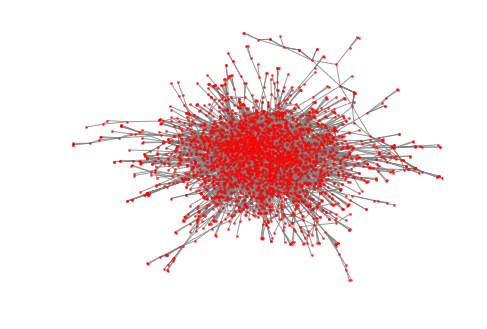

In [12]:
plot_this_graph(giant_component, "Ploteo de la componente gigante")

<h3>4. Tamaños de Vecindades</h3>
<blockquote>Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno de seis grados de separación.</blockquote>

<b>Dudas:</b> 
<ul>
    <li>No me queda claro si el número de autores alcanzados en función de la distancia te diría la 
    |\sum {\forall v \in Vecino(semilla)} Vecinos(v)|
    o
    |\sum {\forall v \in Vecino(semilla)} Vecinos(v)| / |Vecinos(semilla)|</li>
</ul>

In [138]:
def acum_prev_values_over_array_index(_values):
    acum = 0
    for index,val in enumerate(_values):
        acum += val 
        _values[index] = acum
    return

## Common BFS counting at each depth:
#####"how many nodes are at the next depth of the bfs tree?" (this are the nodes that we havent visited yet)
#####"using the nodes at the actual depth, how many nodes can we visit?"

n_repeat = 100
nodes_seeds = [ rnd.choice(np.array(giant_component.nodes)) for _ in range(n_repeat) ]
results_authors_that_can_be_visited_in_func_of_depth = []
results_new_nodes_in_func_of_depth = []

for a_node in nodes_seeds:    
    a_bfs_tree = nx.bfs_tree(giant_component, a_node)
    tree_length = len(nx.dag_longest_path(a_bfs_tree))+1
    
    visited_sets = np.array([set() for _ in range(tree_length)])
    acum_authors_visited_in_func_of_depth = np.zeros((tree_length))
    new_authors_in_func_of_depth = np.zeros((tree_length))

    d = deque([(0,a_node)])
    while len(d) != 0:
        (depth,node) = d.pop()
        depth += 1

        #Nodes in next step weren't visited
        node_neighbors = list(nx.neighbors(a_bfs_tree, node))
        new_authors_in_func_of_depth[depth] += len(node_neighbors)
        
        #How many authors we have visited at this depth
        visited_sets[depth].update(node_neighbors)
        acum_authors_visited_in_func_of_depth[depth] = len(visited_sets[depth])
        
        #Next step
        for ng in node_neighbors:
            d.append((depth,ng))
        
    #acum_prev_values_over_array_index(acum_authors_visited_in_func_of_depth)
    
    results_authors_that_can_be_visited_in_func_of_depth.append(list(map(int, acum_authors_visited_in_func_of_depth)))
    results_new_nodes_in_func_of_depth.append(list(map(int, new_authors_in_func_of_depth)))

In [139]:
size_max = len(max( [max(results_authors_that_can_be_visited_in_func_of_depth,key=len),
      max(results_new_nodes_in_func_of_depth,key=len)]
   ))

for index, an_array in  enumerate(results_authors_that_can_be_visited_in_func_of_depth):
    results_authors_that_can_be_visited_in_func_of_depth[index] = np.pad(an_array,(0,size_max-len(an_array)),'constant')
        
for index, an_array in  enumerate(results_new_nodes_in_func_of_depth):
    results_new_nodes_in_func_of_depth[index] = np.pad(an_array,(0,size_max-len(an_array)),'constant')
    

In [151]:
results_authors_that_can_be_visited_in_func_of_depth

[array([  0,   6,  14,  77, 299, 786, 995, 522, 228,  87,  23,   8,   2,
          0,   0,   0]),
 array([   0,    2,    8,   48,  201,  633, 1056,  662,  308,   95,   31,
           3,    0,    0,    0,    0]),
 array([   0,    2,    2,    6,   20,   93,  327,  797, 1001,  519,  209,
          61,    8,    2,    0,    0]),
 array([  0,   3,   2,   5,   6,  10,  32, 148, 578, 954, 833, 328, 120,
         25,   3,   0]),
 array([  0,   5,  24, 142, 568, 947, 790, 389, 137,  40,   5,   0,   0,
          0,   0,   0]),
 array([  0,   2,   6,  38, 156, 591, 998, 793, 320, 109,  29,   5,   0,
          0,   0,   0]),
 array([  0,   7,  22,  20, 104, 432, 934, 893, 430, 166,  29,   9,   1,
          0,   0,   0]),
 array([  0,   2,  11,  75, 334, 811, 978, 548, 193,  70,  22,   3,   0,
          0,   0,   0]),
 array([   0,   11,   51,  255,  726, 1012,  637,  246,   98,   10,    1,
           0,    0,    0,    0,    0]),
 array([   0,    2,   22,   66,  160,  509, 1040,  782,  308,  118,   

In [157]:
#Ahora deberíamos hacer el promedio en cada posición supongo pero si hay un cero no nos interesa creo. No estoy seguro de eso.
scaler = preprocessing.StandardScaler().fit(results_authors_that_can_be_visited_in_func_of_depth)
#print (scaler)
mean_results_authors_that_can_be_visited_in_func_of_depth = scaler.transform(results_authors_that_can_be_visited_in_func_of_depth)

print ("media: ")
print(scaler.mean_)
print ("std: ")
print(scaler.var_)
print ("samples: {}".format(scaler.n_samples_seen_))

16
media: 
[  0.00000000e+00   4.43000000e+00   2.27500000e+01   9.88700000e+01
   3.32260000e+02   6.71960000e+02   7.77980000e+02   5.84210000e+02
   3.36680000e+02   1.46270000e+02   5.22600000e+01   1.50100000e+01
   3.55000000e+00   6.70000000e-01   1.00000000e-01   0.00000000e+00]
std: 
[  0.00000000e+00   3.44651000e+01   8.02987500e+02   1.07431931e+04
   6.41975724e+04   1.07821678e+05   5.46449396e+04   6.82428259e+04
   7.87123776e+04   3.22528171e+04   1.02508324e+04   1.47110990e+03
   1.72967500e+02   8.30110000e+00   2.50000000e-01   0.00000000e+00]
samples: 100


In [16]:
#results_new_nodes_in_func_of_depth

<h3>5. Mundos Pequeños</h3>
<blockquote>
    <p>Compute el coeficiente de clustering C y el camino mínimo medio l para la componente gigante. Genere un grafo aleatorio con la misma distribución de grado y compute las mismas medidas para este grafo. Compare e interprete los resultados. ¿Se trata de un grafo con estructura de mundos pequeños?</p>
</blockquote>

In [17]:
# average_shortest_path_length se demora bastante: tiene sentido siendo floyd+promedio_entre_cada_camino 
def get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(_g):
    _g_trans = nx.transitivity(_g)
    _g_exact_mean_clust = nx.average_clustering(_g, nodes=_g.nodes)
    _g_mean_spl = nx.average_shortest_path_length(_g)
    return _g_trans, _g_exact_mean_clust, _g_mean_spl

gc_t, gc_c, gc_spl = get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(giant_component)
print ("Transitividad: {}".format(gc_t))
print ("Coeficiente de clustering exacto: {}".format(gc_c))
print ("Cámino mínimo medio: {}".format(gc_spl))

Transitividad: 0.28550056950512553
Coeficiente de clustering exacto: 0.483026194446878
Cámino mínimo medio: 6.098283712648817


In [18]:
gc_list_of_degres = nx.degree_histogram(giant_component)
gc_mean_degree = int(np.array([k_degree*nodes_count for k_degree, nodes_count in enumerate(gc_list_of_degres)]).sum()/np.array(gc_list_of_degres).sum())
gc_n_c = giant_component.number_of_nodes()
#ponemos varios p's y promediamos?

In [19]:
con_ws_info = []
ws_info = []
nws_info = []
for _ in range(1):
    p = np.random.uniform(low=0.0, high=1.0, size=None)
    print (p)
    num = 0
    for _g, _list in [(nx.watts_strogatz_graph(gc_n_c, gc_mean_degree, p), ws_info),\
                      (nx.connected_watts_strogatz_graph(gc_n_c, gc_mean_degree, p, tries=100), con_ws_info),\
                      (nx.newman_watts_strogatz_graph(gc_n_c, gc_mean_degree, p), nws_info)]:
        print (num)
        num+=1
        _g_t, _g_c, _g_spl = get_trans_avg_clustering_coef_and_avg_shortest_path_length_of_this_graph(_g)
        _list.append((_g_t, _g_c, _g_spl))

0.6358474885894676
0
1
2


In [20]:
arrays_index = [
    ['Giant Component','Connected SW Small-World', 'SW Small-World', 'NSW Small-World']
]
index = pd.MultiIndex.from_arrays(arrays_index, names=["tipo"])

arrays_columns = [
    ['Transitivity','Avg Clustering Coef','Avg Shortest Path Length']
]
index_columns = pd.MultiIndex.from_arrays(arrays_columns, names=["Métricas"])

_values = np.array([(gc_t, gc_c, gc_spl)]+con_ws_info+ws_info+nws_info)

df = pd.DataFrame(data=_values, index=index, columns=index_columns)
print(df)

Métricas                  Transitivity  Avg Clustering Coef  \
tipo                                                          
Giant Component               0.285501             0.483026   
Connected SW Small-World      0.021701             0.026291   
SW Small-World                0.020477             0.025449   
NSW Small-World               0.156639             0.190356   

Métricas                  Avg Shortest Path Length  
tipo                                                
Giant Component                           6.098284  
Connected SW Small-World                  6.377479  
SW Small-World                            6.356886  
NSW Small-World                           4.930821  


<h3>6. Estrellas</h3>
<blockquote>
    <p>Discuta cómo haría para individuar a los autores “estrella” del campo. Evalúe quiénes son estos autores según por lo menos dos métricas diferentes. Analice qué sucedería con la comunidad si estos autores desapareciesen. En particular, determine cuántos autores deberían desaparecer para que desaparezca la componente gigante del grafo.</p>
</blockquote>

In [23]:
# Vamos con sólo Betweenness e intentar graficar algo con colores
gc_cls = nx.closeness_centrality(giant_component, wf_improved=True)
gc_btw = nx.betweenness_centrality(giant_component)
gc_deg = nx.degree_centrality(giant_component)
# Parece que no convergemos ni con 2000 itearciones
#gc_katz = nx.katz_centrality(giant_component, alpha=0.1, beta=1.0, max_iter=2000)

distance_cls_btw_katz = {}
for node in giant_component.nodes():
    distance_cls_btw_katz[node] = gc_cls[node] + gc_btw[node]# + gc_deg[node] + gc_katz[node]

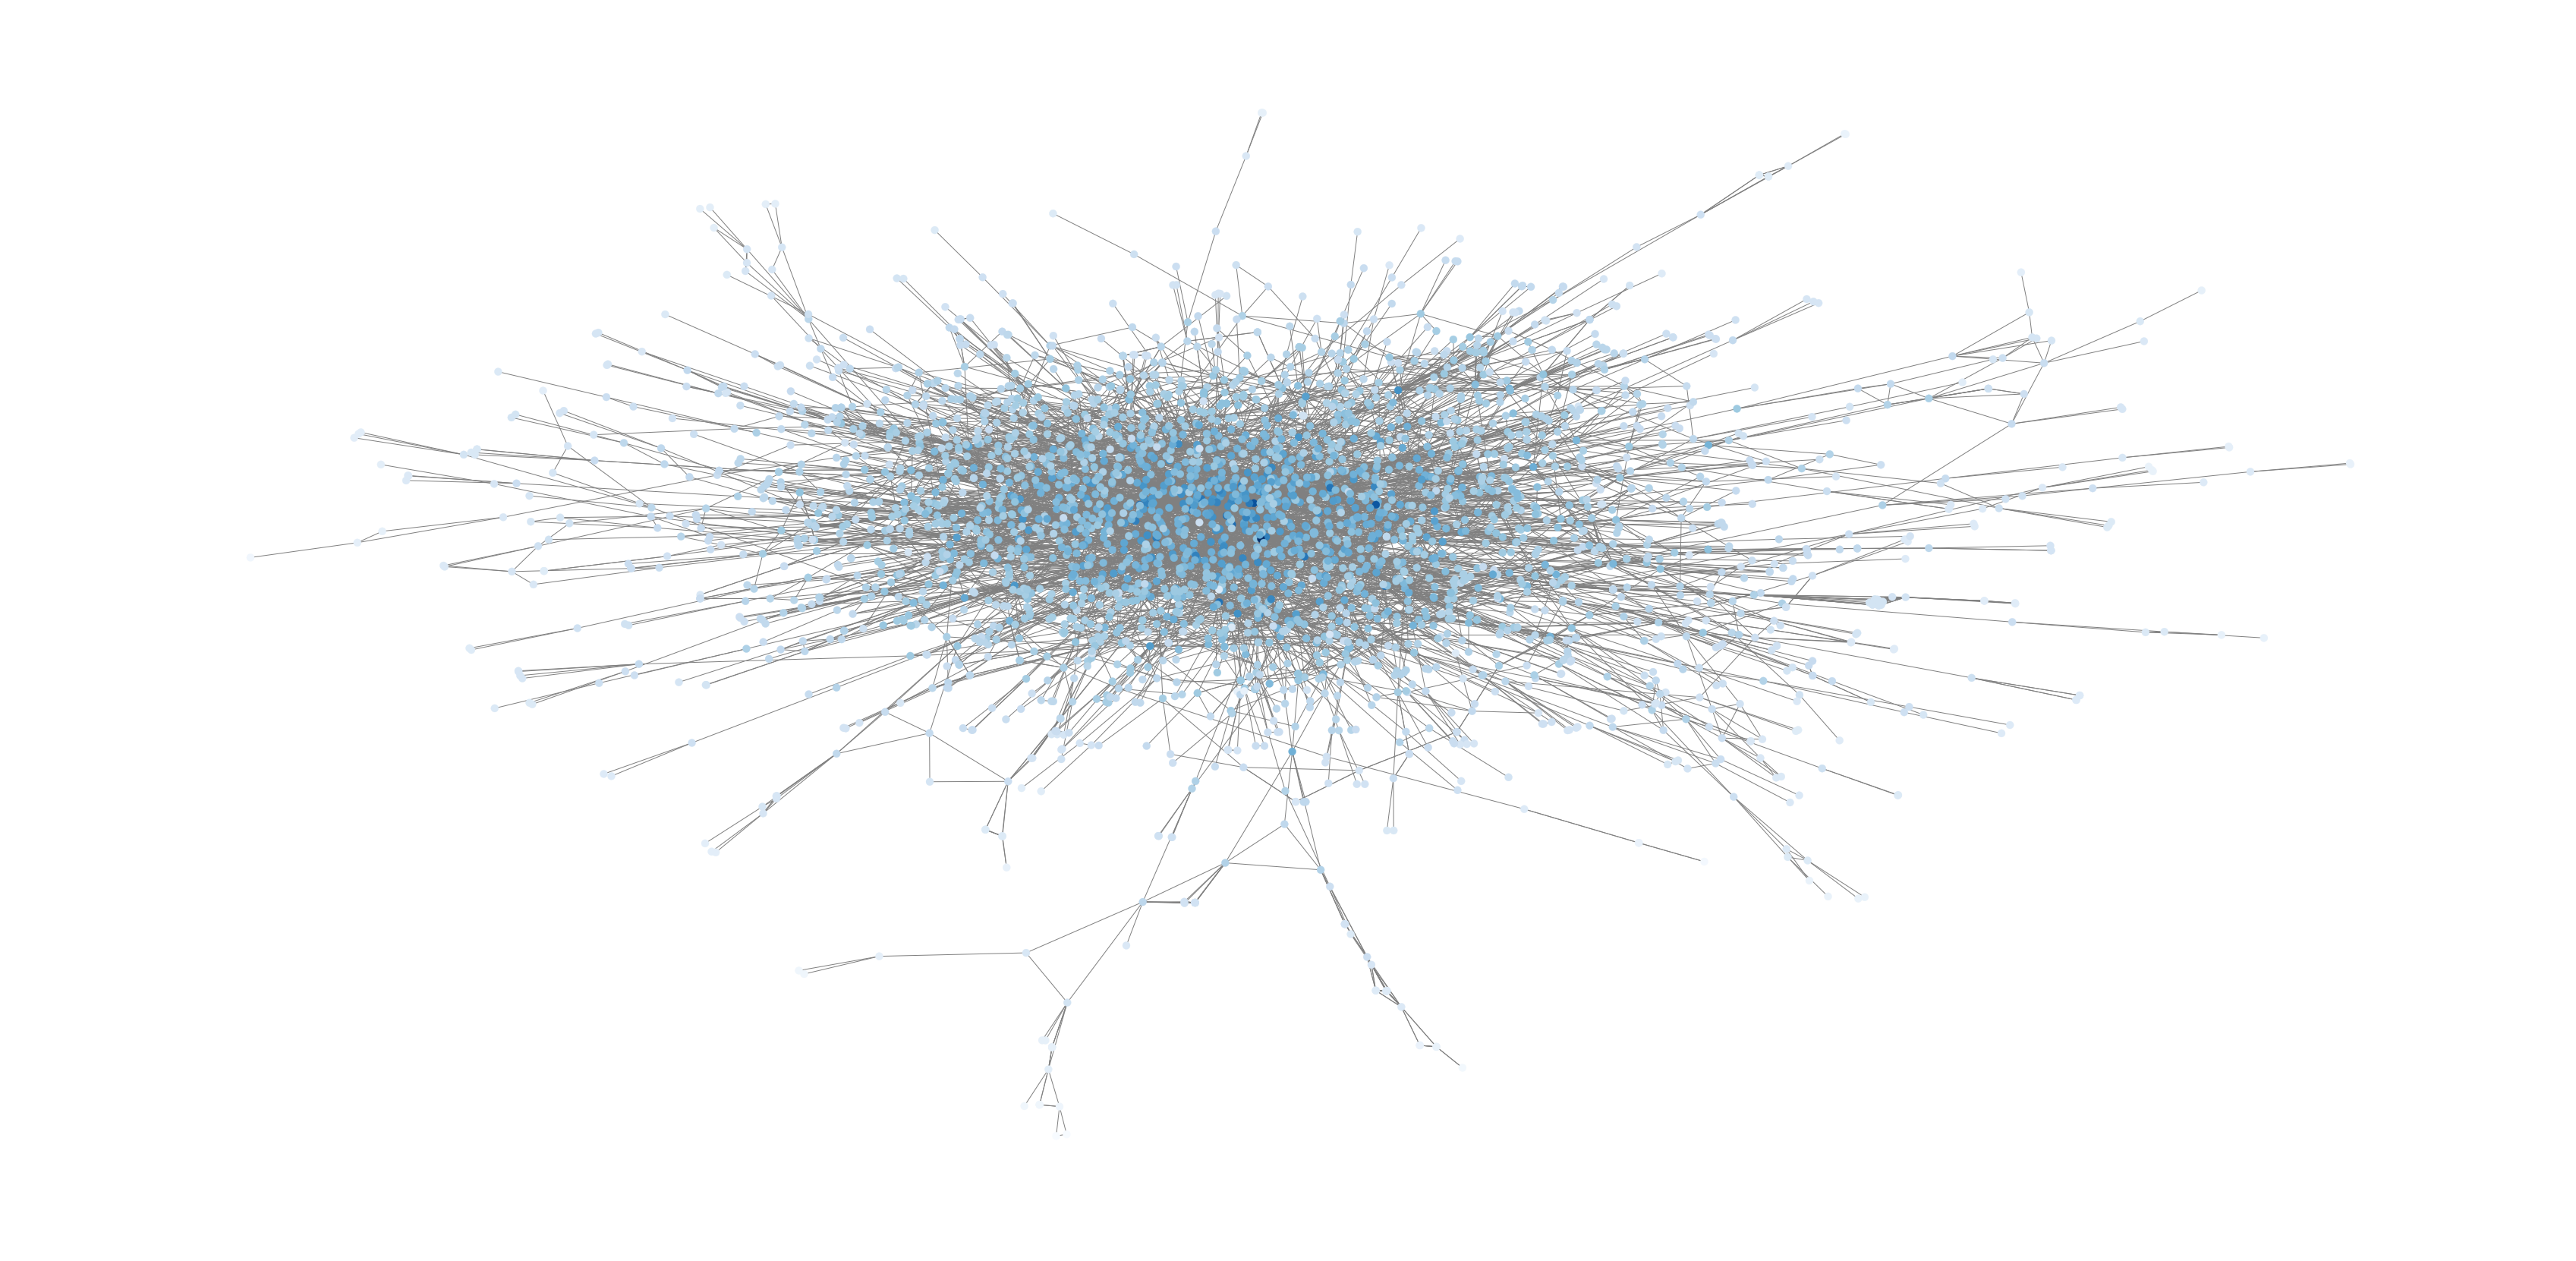

In [40]:
#Estaría mejor que cambie de colores y solo dentro de la gama del azul
_min = np.array(list(distance_cls_btw_katz.values())).min()
_max = np.array(list(distance_cls_btw_katz.values())).max()
color = [100*(distance_cls_btw_katz[_n]-_min)/_max for _n in giant_component]
#print (color)
#Un vistazo a la componente gigante
plt.figure(1,figsize=(60,30))
plt.axis('off')
nx.draw_networkx(giant_component, node_color=color,cmap=plt.cm.Blues, label="Closeness-Betweenness-Degree-Katz distance", pos=nx.spring_layout(giant_component),node_shape="o", node_size=100, with_labels=False, edge_color='grey')
plt.show()

In [ ]:
#Supongo que sigue hacer un dendograma y listo